# Packages import

In [10]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from my_package import my_functions  as mp
import warnings
from PIL import Image
import skimage

warnings.filterwarnings('ignore')
%matplotlib inline

## Paths and filenames

In [11]:
Image_Path = '../../Gamaya_Data_Science_Assignment_v1_3_short/corruptedImage.png'

## Image preview

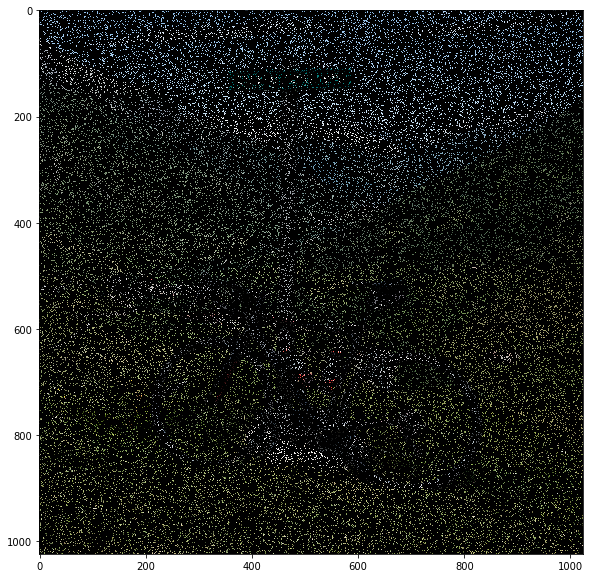

In [12]:
img = mpimg.imread(Image_Path)

# Display the processed image versus original one
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img)
plt.savefig("Figures/InitialImage.png", dpi=100,  bbox_inches='tight')

# Check corrupted pixels location

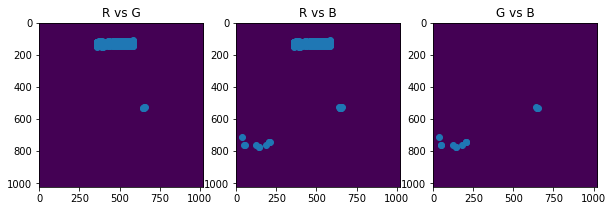

In [13]:
# Global index of corrupted pixel location
Corrupted_Id = img == 0

# Color index of corrupted pixel location
R_Corrupted_Id = Corrupted_Id[:, :, 0]
G_Corrupted_Id = Corrupted_Id[:, :, 1]
B_Corrupted_Id = Corrupted_Id[:, :, 2]

# Corrupted pixel check
if np.sum(R_Corrupted_Id) == np.sum(G_Corrupted_Id) and np.sum(R_Corrupted_Id) == np.sum(B_Corrupted_Id):
    print('Equal number of corrupted pixel within each band')

# Equality of band corruption check
if np.sum(R_Corrupted_Id != G_Corrupted_Id) == 0 and np.sum(R_Corrupted_Id != B_Corrupted_Id) == 0:
    print('Equal corruption in every band')

# Show differences in locations
fig, ax = plt.subplots(1, 3, figsize=(10, 30))
mp.scatter_Location(R_Corrupted_Id != G_Corrupted_Id, ax[0], title='R vs G')
mp.scatter_Location(R_Corrupted_Id != B_Corrupted_Id, ax[1], title='R vs B')
mp.scatter_Location(G_Corrupted_Id != B_Corrupted_Id, ax[2], title='G vs B')

# Denoising processing based on median filters

## Serial processing

In [16]:
# Launch iterative image processing
Denoised_Constat = mp.Full_denoisingPipeline(img, mp.Denoise_RGB_byMedian)


Iteration 1:
 Processing band 1
  Achieved processing:  99 % 
 Processing band 2
  Achieved processing:  99 % 
 Processing band 3
  Achieved processing:  99 %   
 Process ended, number of resulting corrupted pixel : 949496

Iteration 2:
 Processing band 1
  Achieved processing:  99 %    
 Processing band 2
  Achieved processing:  99 %        
 Processing band 3
  Achieved processing:  99 %    
 Process ended, number of resulting corrupted pixel : 113769

Iteration 3:
 Processing band 1
  Achieved processing:  99 %      
 Processing band 2
  Achieved processing:  99 %    
 Processing band 3
  Achieved processing:  99 %      
 Process ended, number of resulting corrupted pixel : 5371

Iteration 4:
 Processing band 1
  Achieved processing:  99 %  
 Processing band 2
  Achieved processing:  99 % 
 Processing band 3
  Achieved processing:  99 %  
 Process ended, number of resulting corrupted pixel : 118

Iteration 5:
 Processing band 1
  Achieved processing:  99 %  
 Processing band 2
  Ac

##  Multi-threading processing

In [17]:
# Launch iterative parallel image processing with constant moving window size
MultiDenoised_Constant = mp.RGB_Multiprocess_Pipeline(img, adaptative=False)

starting process on band R
starting process on band G
starting process on band B

Iteration 1 on band: R
Iteration 1 on band: G
Iteration 1 on band: B
Iteration 2 on band: G
Iteration 2 on band: B
Iteration 3 on band: G
Iteration 4 on band: G
Iteration 5 on band: G
Iteration 3 on band: B
Iteration 4 on band: B
Iteration 2 on band: R
Iteration 5 on band: B
Iteration 3 on band: R
Iteration 4 on band: R
Iteration 5 on band: R
Iteration 6 on band: R

##  Adaptative Multithreading processing

In [14]:
# Launch iterative parallel image processing with adaptative moving window size
MultiDenoised_Adaptative = mp.RGB_Multiprocess_Pipeline(img, adaptative=True)

starting process on band R
starting process on band G
starting process on band B

Iteration 1 on band: R
Iteration 1 on band: G
Iteration 1 on band: B
Iteration 2 on band: B
Iteration 2 on band: G
Iteration 2 on band: R

# Results

##### This process is inspered from the following article(Jourabloo et al. 2012). It consists in the iterative application of median filter on non-corrupted pixels, with adaptative window size. Both possibility with and without adaptative moving window size, have been tested. Both results are very comparable. Yet, the process is not performing good on some critical spot such as the metallic pole. Due to its spectral similarity with the mountain, the signal get lost as it is merge with the background. 

##### In case we have to process a large number of image, a very interressant alternative would be to build a training set of image (by adding impulse noise) in order to train an generative adversial nets aimed at images restoring. The restoring process would be realy fast however the training could be time consuming.

Jourabloo, A., Feghahati, A. H., & Jamzad, M. (2012). New algorithms for recovering highly corrupted images with impulse noise. Scientia Iranica, 19(6), 1738–1745. https://doi.org/https://doi.org/10.1016/j.scient.2012.07.016

In [18]:
assert np.sum(Denoised_Constat - MultiDenoised_Constant) == 0
assert np.sum(MultiDenoised_Adaptative - MultiDenoised_Constant) != 0

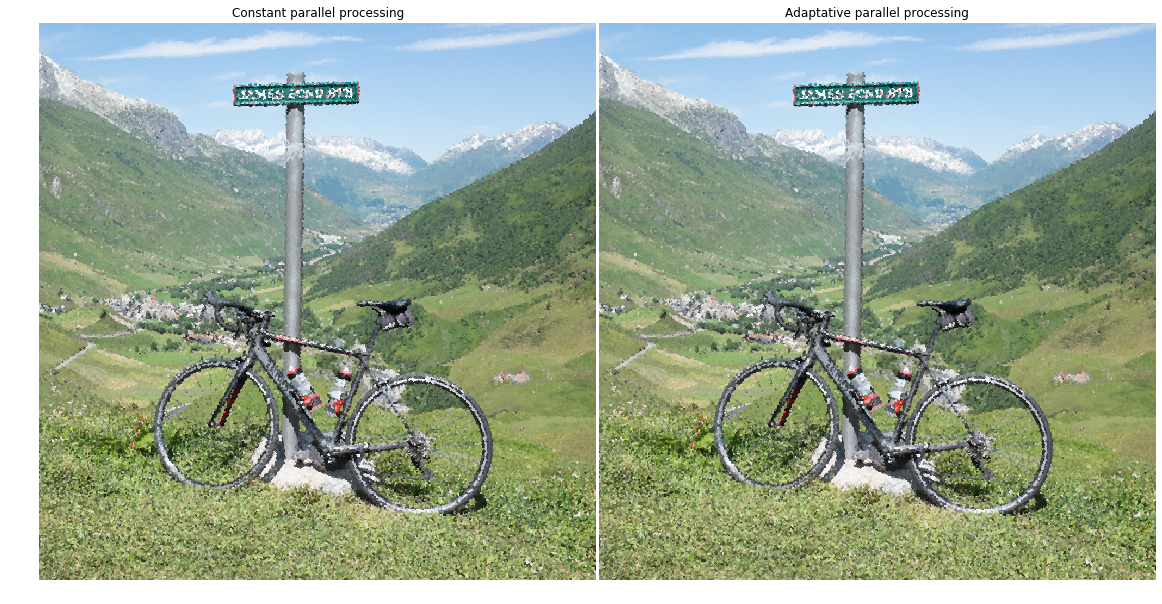

In [19]:
# Display the processed image versus original one
fig, ax = plt.subplots(1, 2, figsize=(20, 40))
ax[0].imshow(MultiDenoised_Constant)
ax[1].imshow(MultiDenoised_Adaptative)

# Set Titles
ax[0].set_title('Constant parallel processing')
ax[1].set_title('Adaptative parallel processing')

# Set axes invisible
[ax[i].axis('off') for i in range(len(ax))];
plt.subplots_adjust(wspace=0.005, hspace=0)

# Save figure
plt.savefig("Figures/method_comparison.png", dpi=100,  bbox_inches='tight')

In [ ]:
# Save processed images
ImName = ['Constant Serial', 'Constant parallel', 'Adaptative parallel']
ImVar = [Denoised_Constat, MultiDenoised_Constant, MultiDenoised_Adaptative]
for v, n in zip(ImVar, ImName):
    im = Image.fromarray(skimage.img_as_ubyte(v)).convert('RGB')
    im.save('Figures/'+n.replace(' ','_')+'.png')